Nama  : M Kholilullah

Group : MLT1

#Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d CooperUnion/anime-recommendations-database

Saving kaggle.json to kaggle.json
kaggle.json
100% 25.0M/25.0M [00:00<00:00, 37.2MB/s]
100% 25.0M/25.0M [00:00<00:00, 30.8MB/s]


In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

In [3]:
!unzip "/content/anime-recommendations-database.zip" -d "/content/"

Archive:  /content/anime-recommendations-database.zip
  inflating: /content/anime.csv      
  inflating: /content/rating.csv     


In [4]:
anime = pd.read_csv('/content/anime.csv')
anime_rating= pd.read_csv('/content/rating.csv')

#Data Understanding

##Anime

In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


##Rating

In [ ]:
anime_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
anime_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


#Exploratory Data Analisys

##Univariate Exploratory Data Analysis


###Variable Description

In [6]:
print('The animes dataset has', anime['anime_id'].nunique(), 'unique animes')
print('The ratings dataset has', anime['rating'].nunique(), 'unique ratings')
print('The users dataset has', anime_rating['user_id'].nunique(), 'unique users')
print('The genres dataset has', anime['genre'].nunique(), 'unique genres')
print('The unique ratings are', sorted(anime_rating['rating'].unique()), anime_rating['rating'].nunique(), 'unique ratings')

The animes dataset has 12294 unique animes
The ratings dataset has 598 unique ratings
The users dataset has 73515 unique users
The genres dataset has 3264 unique genres
The unique ratings are [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 11 unique ratings


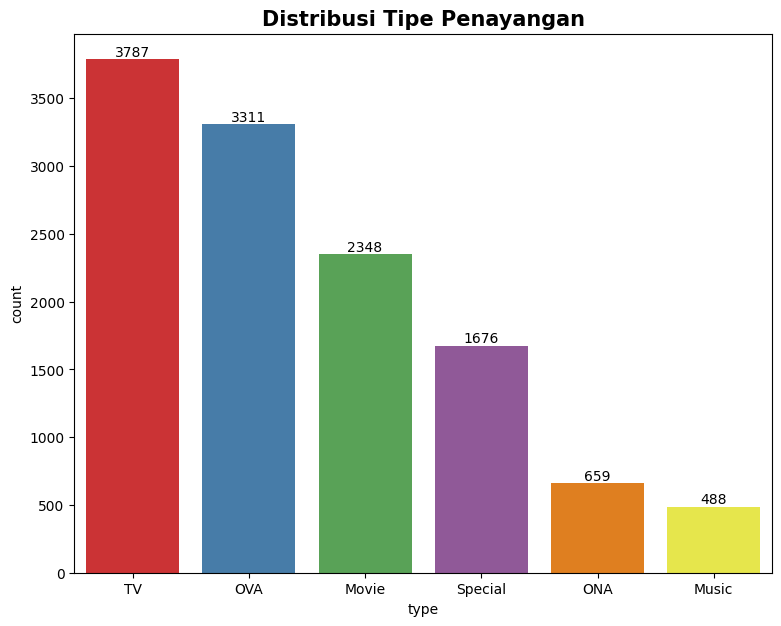

In [ ]:
plt.figure(figsize=(9, 7))

abs_values = anime["type"].value_counts(ascending=False).values
ax = sns.countplot(
    x= "type",
    data= anime,
    order=anime["type"].value_counts().index,
    palette='Set1'
)
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Distribusi Tipe Penayangan",
    loc="center",
    fontweight="bold",
    size=15
)
plt.show()

#Data Preprocessing

##Missing Value Checking & Handling

In [ ]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
anime_rating.loc[anime_rating.rating == -1, 'rating'] = np.NaN
anime_rating.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


##Sorted anime by type

In [ ]:
print(anime.shape)
anime = anime[(anime['type'] == 'TV') | (anime['type'] == 'Movie')]
print(anime.shape)

(12294, 7)
(6135, 7)


#Data Preparation

##Merging data animes and users rating

In [ ]:
joined_df = anime_rating.merge(anime, how='inner', on='anime_id')
joined_df.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


##Sorted anime > 100 rating

In [ ]:
aggregate_ratings = joined_df.groupby('name').agg(rata_rata_rating = ('rating_x', 'mean'), jumlah_rating = ('rating_x', 'count')).reset_index()
aggregate_ratings

,name,rata_rata_rating,jumlah_rating
0,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,1.000000,1
1,&quot;Bungaku Shoujo&quot; Movie,7.840154,1295
2,.hack//G.U. Trilogy,7.458880,839
3,.hack//Roots,7.267589,1663
4,.hack//Sign,7.362637,3549
...,...,...,...
5539,iDOLM@STER Xenoglossia,7.034364,291
5540,s.CRY.ed,7.597943,1945
5541,xxxHOLiC,8.263873,4487
5542,xxxHOLiC Kei,8.424535,2796


In [ ]:
print('The number_of_rating are', sorted(anime_rating['rating'].unique()), 'unique ratings')

The number_of_rating are [nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] unique ratings


In [ ]:
agg_ratings_100 = aggregate_ratings[aggregate_ratings['jumlah_rating']>100]

agg_ratings_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2483 entries, 1 to 5543
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2483 non-null   object 
 1   rata_rata_rating  2483 non-null   float64
 2   jumlah_rating     2483 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.6+ KB


##Check the most popular anime

In [ ]:
agg_ratings_100.sort_values(by='jumlah_rating', ascending=False)

,name,rata_rata_rating,jumlah_rating
927,Death Note,8.834629,34226
4701,Sword Art Online,8.140213,26310
4373,Shingeki no Kyojin,8.725741,25290
765,Code Geass: Hangyaku no Lelouch,8.927796,24126
169,Angel Beats!,8.549714,23565
...,...,...,...
4117,Saiko Robot Kombock,5.568627,102
3008,Maou Dante,6.534653,101
4856,Tetsuwan Atom,7.297030,101
1997,Hotori: Tada Saiwai wo Koinegau,7.227723,101


##Merging aggregates data and anime

In [ ]:
df_100 = pd.merge(joined_df, agg_ratings_100[['name']], on='name', how='inner')
df_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6271201 entries, 0 to 6271200
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating_x  float64
 3   name      object 
 4   genre     object 
 5   type      object 
 6   episodes  object 
 7   rating_y  float64
 8   members   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 478.5+ MB


In [ ]:
print('The animes dataset has', df_100['anime_id'].nunique(), 'unique animes')
print('The ratings dataset has', df_100['rating_y'].nunique(), 'unique ratings')
print('The users dataset has', df_100['user_id'].nunique(), 'unique users')
print('The unique ratings are', sorted(df_100['rating_x'].unique()), df_100['rating_x'].nunique(), 'unique ratings')

The animes dataset has 2483 unique animes
The ratings dataset has 329 unique ratings
The users dataset has 73291 unique users
The unique ratings are [nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] 10 unique ratings


##Missing Value Crosscheck

In [ ]:
df_100.isnull().sum()

user_id           0
anime_id          0
rating_x    1111128
name              0
genre             0
type              0
episodes          0
rating_y          0
members           0
dtype: int64

In [ ]:
df_100 = df_100.fillna(0)

In [ ]:
df_100.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,0.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,0.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,0.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [ ]:
df_300 = df_100[df_100.members > 300000]
df_300

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,0.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,0.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,0.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
4822986,73494,1482,7.0,D.Gray-man,"Action, Adventure, Comedy, Shounen",TV,103,8.20,334399
4822987,73495,1482,7.0,D.Gray-man,"Action, Adventure, Comedy, Shounen",TV,103,8.20,334399
4822988,73499,1482,9.0,D.Gray-man,"Action, Adventure, Comedy, Shounen",TV,103,8.20,334399
4822989,73500,1482,9.0,D.Gray-man,"Action, Adventure, Comedy, Shounen",TV,103,8.20,334399


##Create a Dataframe with only Anime Contents

In [ ]:
animes_df = df_100[['anime_id', 'name', 'genre',	'type',	'rating_y']]
animes_df.sort_values('anime_id')


,anime_id,name,genre,type,rating_y
3815238,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,8.82
3813764,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,8.82
3813765,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,8.82
3813766,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,8.82
3813767,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,8.82
...,...,...,...,...,...
5065240,33421,Hitori no Shita: The Outcast,"Action, Super Power, Supernatural",TV,6.67
5065241,33421,Hitori no Shita: The Outcast,"Action, Super Power, Supernatural",TV,6.67
5065242,33421,Hitori no Shita: The Outcast,"Action, Super Power, Supernatural",TV,6.67
5065230,33421,Hitori no Shita: The Outcast,"Action, Super Power, Supernatural",TV,6.67


In [ ]:
animes_df = animes_df.drop_duplicates('anime_id')
animes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2483 entries, 0 to 6271079
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  2483 non-null   int64  
 1   name      2483 non-null   object 
 2   genre     2483 non-null   object 
 3   type      2483 non-null   object 
 4   rating_y  2483 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 116.4+ KB


#Item Based Collaborative Filtering

##User Item Matrix

In [ ]:
item_matrix = df_100.pivot_table(index='name', columns='user_id', values='rating_x')
item_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Trilogy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//Roots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//Sign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//Tasogare no Udewa Densetsu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Normalization

In [ ]:
matrix_normalize = item_matrix.subtract(item_matrix.mean(axis=1), axis = 0)
matrix_normalize.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Trilogy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//Roots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//Sign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//Tasogare no Udewa Densetsu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Cosine Similarity

In [ ]:
item_similarity = matrix_normalize.T.corr()
item_similarity.head()

name,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Trilogy,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//The Movie: Sekai no Mukou ni,009 Re:Cyborg,009-1,07-Ghost,1001 Nights,...,"Zone of the Enders: Dolores, I",Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,eX-Driver the Movie,ef: A Tale of Melodies.,ef: A Tale of Memories.,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Movie,1.000000,0.608942,0.665833,0.634468,0.684455,0.644645,0.718602,0.869261,0.607874,0.512961,...,0.644178,0.661226,0.451072,0.652057,0.658314,0.629602,0.702473,0.593608,0.559721,0.585452
.hack//G.U. Trilogy,0.608942,1.000000,0.816991,0.756329,0.779165,0.784701,0.710829,0.776042,0.644197,0.720831,...,0.704866,0.442388,0.541954,0.632229,0.638465,0.677822,0.702287,0.671544,0.696184,0.712623
.hack//Roots,0.665833,0.816991,1.000000,0.844866,0.829440,0.734868,0.650153,0.661870,0.679218,0.504100,...,0.713836,0.712720,0.700568,0.689831,0.623553,0.629456,0.670249,0.677405,0.621133,0.690267
.hack//Sign,0.634468,0.756329,0.844866,1.000000,0.810854,0.688917,0.632281,0.749127,0.656404,0.562636,...,0.710987,0.314417,0.779964,0.644933,0.643734,0.623653,0.703965,0.672808,0.654130,0.658672
.hack//Tasogare no Udewa Densetsu,0.684455,0.779165,0.829440,0.810854,1.000000,0.720162,0.617475,0.714417,0.641859,0.692038,...,0.689915,0.346517,0.604434,0.601962,0.579883,0.513189,0.658699,0.622259,0.572045,0.648637


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity_cosine = cosine_similarity(matrix_normalize.fillna(0))
item_similarity_cosine

array([[1.        , 0.0600223 , 0.06992487, ..., 0.08202795, 0.08068475,
        0.07774348],
       [0.0600223 , 1.        , 0.4549842 , ..., 0.10295044, 0.10166105,
        0.09371005],
       [0.06992487, 0.4549842 , 1.        , ..., 0.13279132, 0.10793268,
        0.09496479],
       ...,
       [0.08202795, 0.10295044, 0.13279132, ..., 1.        , 0.66273838,
        0.47038847],
       [0.08068475, 0.10166105, 0.10793268, ..., 0.66273838, 1.        ,
        0.52962934],
       [0.07774348, 0.09371005, 0.09496479, ..., 0.47038847, 0.52962934,
        1.        ]])

##Getting Recommendation

In [ ]:
import operator

def itemBasedRecommendation(picked_userid, number_of_similar_items, number_of_recommendations):

  picked_userid_unwatched = pd.DataFrame(matrix_normalize[picked_userid].isna()).reset_index()
  picked_userid_unwatched = picked_userid_unwatched[picked_userid_unwatched[101]==True]['name'].values.tolist()

  picked_userid_watched = pd.DataFrame(matrix_normalize[picked_userid].dropna(axis=0, how='all')\
                            .sort_values(ascending=False))\
                            .reset_index()\
                            .rename(columns={101:'rating'})

  rating_prediction ={}
  print("Watched animes :", picked_userid_watched)

  for picked_movie in picked_userid_unwatched:
    picked_movie_similarity_score = item_similarity[[picked_movie]].reset_index().rename(columns={picked_movie:'similarity_score'})
    picked_userid_watched_similarity = pd.merge(left=picked_userid_watched,
                                                right=picked_movie_similarity_score, on='name', how='inner')\
                                                .sort_values('similarity_score', ascending=False)[:number_of_similar_items]

    predicted_rating = round(np.average(picked_userid_watched_similarity['rating'], weights=picked_userid_watched_similarity['similarity_score']), 6)

    rating_prediction[picked_movie] = predicted_rating

  return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]


In [ ]:
recommended_anime = itemBasedRecommendation(picked_userid= 101, number_of_similar_items= 5, number_of_recommendations= 5)
recommended_anime

[('Eikyuu Kazoku', 3.232782),
 ('Cutey Honey', 3.192767),
 ('Samurai Gun', 3.170783),
 ('Kujira no Chouyaku', 3.162018),
 ('Omae Umasou da na', 3.15765)]

In [ ]:
recommended_anime = itemBasedRecommendation(picked_userid= 101, number_of_similar_items= 10, number_of_recommendations= 5)
recommended_anime

Watched animes :      name    rating
0  Naruto  3.279614
1  Bleach  2.936084


[('Eikyuu Kazoku', 3.232782),
 ('Cutey Honey', 3.192767),
 ('Samurai Gun', 3.170783),
 ('Kujira no Chouyaku', 3.162018),
 ('Omae Umasou da na', 3.15765)]

In [ ]:
animes_df[animes_df.name.eq('Eikyuu Kazoku')]

,anime_id,name,genre,type,rating_y
5841563,1106,Eikyuu Kazoku,"Comedy, Psychological",Movie,6.16


In [ ]:
a1 = df_100[df_100.name.eq('Eikyuu Kazoku')]
print(a1.rating_x.mean())
a2 = df_100[df_100.name.eq('Cutey Honey')]
print(a2.rating_x.mean())
a3 = df_100[df_100.name.eq('Samurai Gun')]
print(a3.rating_x.mean())
a4 = df_100[df_100.name.eq('Kujira no Chouyaku')]
print(a4.rating_x.mean())
a5 = df_100[df_100.name.eq('Omae Umasou da na')]
print(a5.rating_x.mean())

5.3649289099526065
5.408163265306122
4.892215568862276
5.784090909090909
6.970760233918129


In [ ]:
predicted = [3.279614, 3.192767, 3.170783, 3.162018, 3.15765]
actual = [5.364928, 5.408163, 4.892215, 5.784090, 6.970760]
n = len(predicted)
sum = 0

for i in range(n):
    sum += abs(actual[i] - predicted[i])
error = sum/n
print("Mean absolute error : " + str(error))

Mean absolute error : 2.4914648


In [ ]:
picked_userid = 101

picked_userid_watched = pd.DataFrame(matrix_normalize[picked_userid].dropna(axis=0, how='all')\
                          .sort_values(ascending=False))\
                          .reset_index()\
                          .rename(columns={101:'rating'})

picked_userid_watched.head()

,name,rating
0,Naruto,3.279614
1,Bleach,2.936084


In [ ]:
picked_anime = 'Naruto'

picked_anime_similarity_score = item_similarity[[picked_anime]].reset_index().rename(columns={'Naruto':'similarity_score'})

n = 5
picked_userid_watched_similarity = pd.merge(left=picked_userid_watched,
                                            right=picked_anime_similarity_score,
                                            on='name',
                                            how='inner')\
                                     .sort_values('similarity_score', ascending=False)[:5]

picked_userid_watched_similarity

,name,rating,similarity_score
0,Naruto,3.279614,1.000000
1,Bleach,2.936084,0.712526


In [ ]:
predicted_rating = round(np.average(picked_userid_watched_similarity['rating'], weights=picked_userid_watched_similarity['similarity_score']), 6)

print(f'The predicted rating for {picked_anime} by user {picked_userid} is {predicted_rating}' )

The predicted rating for Naruto by user 101 is 3.136683


In [ ]:
# MAE

predicted = [3.136683]
actual = [3.279614]
n = len(predicted)
sum = 0

for i in range(n):
    sum += abs(actual[i] - predicted[i])
error = sum/n
print("Mean absolute error : " + str(error))

Mean absolute error : 0.14293099999999992


#Model Based Collaborative Filtering

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

##Data Preparation

In [ ]:
df = df_300
df.head(1)

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,0.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [ ]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
# Mengubah anime_id menjadi list tanpa nilai yang sama
anime_ids = df['anime_id'].unique().tolist()

# Melakukan proses encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}

# Melakukan proses encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [ ]:
# Mendapatkan jumlah user
num_users = len(df['user_id'])
print(num_users)

# Mendapatkan jumlah anime
num_anime = len(df['anime_id'])
print(num_anime)

# Mengubah rating menjadi nilai float
# df['user_id'] = df['user_id'].values.astype(np.float32)
# df['anime_id'] = df['anime_id'].values.astype(np.float32)
df['rating_x'] = df['rating_x'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating_x'])

# Nilai maksimal rating
max_rating = max(df['rating_x'])

print('Number of User: {}, Number of Anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

1521935
1521935
Number of User: 1521935, Number of Anime: 1521935, Min Rating: 0.0, Max Rating: 10.0


<ipython-input-20-41cd8570e6bc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_x'] = df['rating_x'].values.astype(np.float32)


In [ ]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping anime_id ke dataframe anime
df['anime'] = df['anime_id'].map(anime_to_anime_encoded)

<ipython-input-21-d02bab76fb98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['user_id'].map(user_to_user_encoded)
<ipython-input-21-d02bab76fb98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anime'] = df['anime_id'].map(anime_to_anime_encoded)


##Splitting Data for Training and Validation

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members,user,anime
1294885,67530,6880,9.0,Deadman Wonderland,"Action, Horror, Sci-Fi",TV,12,7.48,453454,39471,39
3957434,34711,10087,8.0,Fate/Zero,"Action, Fantasy, Supernatural",TV,13,8.51,453630,32828,94
544620,41214,10793,9.0,Guilty Crown,"Action, Drama, Sci-Fi, Super Power",TV,22,7.81,460959,34082,11
480627,19461,9919,7.0,Ao no Exorcist,"Action, Demons, Fantasy, Shounen, Supernatural",TV,25,7.92,583823,29693,9
801688,3335,19815,10.0,No Game No Life,"Adventure, Comedy, Ecchi, Fantasy, Game, Super...",TV,12,8.47,602291,26557,22
...,...,...,...,...,...,...,...,...,...,...,...
571360,4468,11757,10.0,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,1557,13
3748671,21300,13601,8.0,Psycho-Pass,"Action, Police, Psychological, Sci-Fi",TV,22,8.50,509109,30085,90
250648,20925,4898,8.0,Kuroshitsuji,"Action, Comedy, Demons, Fantasy, Historical, S...",TV,24,8.06,424919,53525,6
1281662,11224,6880,8.0,Deadman Wonderland,"Action, Horror, Sci-Fi",TV,12,7.48,453454,4035,39


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
# x = df[['user_id', 'anime_id']].values
x = df[['user', 'anime']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating_x'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1217548, 2), (304387, 2), (1217548,), (304387,))

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((5016960, 2), (1254241, 2), (5016960,), (1254241,))

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1217548, 2), (304387, 2), (1217548,), (304387,))

##Model

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_anime, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_anime = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_anime + user_bias + resto_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

callback = EarlyStopping(
    patience=1,
    mode='min',
    monitor ='val_root_mean_squared_error',
    restore_best_weights=True,
)

In [ ]:
# training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 5,
    validation_data = (x_val, y_val),
    callbacks=[callback]
)

Epoch 1/5
38049/38049 [==============================] - 2006s 53ms/step - loss: 0.5659 - root_mean_squared_error: 0.2987 - val_loss: 0.5316 - val_root_mean_squared_error: 0.2710
Epoch 2/5
38049/38049 [==============================] - 2132s 56ms/step - loss: 0.5068 - root_mean_squared_error: 0.2507 - val_loss: 0.4923 - val_root_mean_squared_error: 0.2385
Epoch 3/5
38049/38049 [==============================] - 2076s 55ms/step - loss: 0.4761 - root_mean_squared_error: 0.2249 - val_loss: 0.4720 - val_root_mean_squared_error: 0.2221
Epoch 4/5
38049/38049 [==============================] - 1957s 51ms/step - loss: 0.4599 - root_mean_squared_error: 0.2118 - val_loss: 0.4617 - val_root_mean_squared_error: 0.2142
Epoch 5/5
38049/38049 [==============================] - 2011s 53ms/step - loss: 0.4511 - root_mean_squared_error: 0.2051 - val_loss: 0.4562 - val_root_mean_squared_error: 0.2100


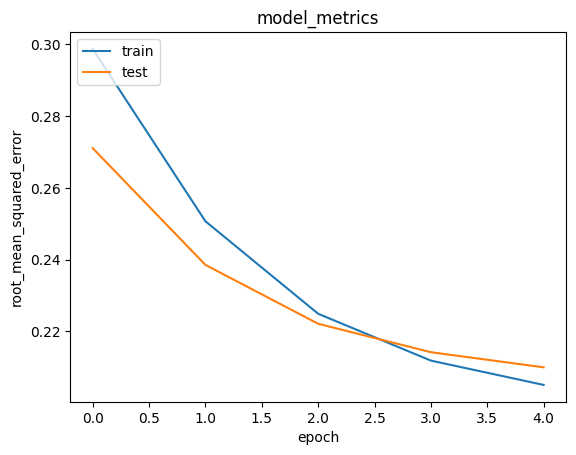

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Getting Recommendation

In [ ]:
anime_df = animes_df
df_record = df_300

In [ ]:
user_id = df_record.user_id.sample(1).iloc[0]
anime_watched_by_user = df_record[df_record.user_id == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
anime_not_watched = anime_df[~anime_df['anime_id'].isin(anime_watched_by_user.anime_id.values)]['anime_id']
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(df_record.anime_id.keys()))
)

anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]

user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

In [ ]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 12)
print('Anime with high ratings from user')
print('----' * 9)

top_animes_user = (
    anime_watched_by_user.sort_values(
        by = 'rating_x',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['anime_id'].isin(top_animes_user)]
for row in anime_df_rows.itertuples():
    print('Anime  :', row.name)
    print('Genres :', row.genre)
    print('----' * 18)

print('----' * 7)
print('Top 10 anime recommendation |')
print('----' * 7)

recommended_animes = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
for row in recommended_animes .itertuples():
    print('Anime  :', row.name)
    print('Genres :', row.genre)
    print('----' * 18)

2/2 [==============================] - 0s 7ms/step
Showing recommendations for users: 67401
Anime with high ratings from user
------------------------------------
Anime  : Fullmetal Alchemist
Genres : Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen
------------------------------------------------------------------------
Anime  : Durarara!!
Genres : Action, Mystery, Supernatural
------------------------------------------------------------------------
Anime  : Higurashi no Naku Koro ni
Genres : Horror, Mystery, Psychological, Supernatural, Thriller
------------------------------------------------------------------------
Anime  : Baccano!
Genres : Action, Comedy, Historical, Mystery, Seinen, Supernatural
------------------------------------------------------------------------
Anime  : Mushishi
Genres : Adventure, Fantasy, Historical, Mystery, Seinen, Slice of Life, Supernatural
------------------------------------------------------------------------
-------------------

##RMSE

In [5]:
forecast_rmse = [0.212526, 0.489392, 0.987328]
actual_rmse   = [0.392827, 0.283836, 0.961220]

MSE = np.square(np.subtract(actual_rmse, forecast_rmse)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error :", RMSE)

Root Mean Square Error : 0.1585805236055172


#Model Development Using Content Based Filtering

##Cosine Similarity

In [ ]:
item_similarity_cosine

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime
cosine_sim_df = pd.DataFrame(item_similarity_cosine, index=animes_df['name'], columns=animes_df['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap anime
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (2483, 2483)


name,Psycho-Pass 2,Kyoukai no Kanata Movie: I&#039;ll Be Here - Mirai-hen,Reikenzan: Hoshikuzu-tachi no Utage,Tears to Tiara,Futari wa Milky Holmes
name,,,,,
Pokemon Best Wishes! Season 2: Kyurem vs. Seikenshi,0.095098,0.062370,0.012645,0.031046,0.014366
Koi Koi 7,0.021520,0.026990,0.025922,0.026185,0.017502
Eikoku Koi Monogatari Emma,0.036989,0.077737,0.036179,0.079242,0.033073
Tayutama: Kiss on My Deity,0.108686,0.254063,0.033780,0.065577,0.017642
Vampire Hunter D,0.086372,0.165663,0.019646,0.094260,0.026700
Kishin Houkou Demonbane (TV),0.020725,0.034910,0.068758,0.067428,0.076976
Venus Senki,0.078068,0.058606,0.027966,0.108925,0.037339
Blood-C: The Last Dark,0.037886,0.046186,0.033840,0.022110,0.011650
Legend of Duo,0.046424,0.030996,0.084186,0.034559,0.053073


##Getting recommendation

In [ ]:
def animeRecommendations(anime_name, similarity_data=cosine_sim_df, items=animes_df[['name','genre', 'type', 'rating_y']], k=10):
    """
    Rekomendasi anime berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,anime_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama anime agar nama makul yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(anime_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
p = animeRecommendations('Hunter x Hunter (2011)')
p

,name,genre,type,rating_y
0,Wagamama☆Fairy Mirumo de Pon!,"Adventure, Comedy, Drama, Fantasy, Kids, Magic...",TV,7.47
1,Denki-gai no Honya-san,"Comedy, Seinen, Slice of Life",TV,7.28
2,Durarara!!,"Action, Mystery, Supernatural",TV,8.38
3,Witch Craft Works,"Action, Fantasy, Magic, Seinen, Supernatural",TV,7.22
4,Persona 3 the Movie 2: Midsummer Knight&#039;s...,"Action, Fantasy, Seinen, Supernatural",Movie,7.90
5,xxxHOLiC Kei,"Comedy, Drama, Mystery, Psychological, Superna...",TV,8.34
6,Ike! Ina-chuu Takkyuubu,"Comedy, Ecchi, School, Sports",TV,7.70
7,Toaru Majutsu no Index: Endymion no Kiseki,"Action, Magic, Sci-Fi, Super Power",Movie,7.71
8,Konjiki no Gash Bell!!: Mecha Vulkan no Raishuu,"Adventure, Shounen, Supernatural",Movie,7.24
9,Robin Hood no Daibouken,"Adventure, Historical, Romance",TV,7.25


In [ ]:
animes_df[animes_df.name.eq('Hunter x Hunter (2011)')]

,anime_id,name,genre,type,rating_y
3351778,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,9.13
